In [1]:
import sys

sys.path.append("..")

import pandas as pd

from src.utils.paths import DATA_DIR

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

## データの読み込み

In [2]:
input_path = DATA_DIR / "breakfast" / "raw"
transaction_df = pd.read_csv(str(input_path / "transaction.csv"))  # 購買データ
product_df = pd.read_csv(str(input_path / "product.csv"))  # 商品データ

In [3]:
transaction_df.head()

,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY
0,14-1月-09,367,1111009477,13,13,13,18.07,1.39,1.57,0,0,1
1,14-1月-09,367,1111009497,20,18,18,27.80,1.39,1.39,0,0,0
2,14-1月-09,367,1111009507,14,14,14,19.32,1.38,1.38,0,0,0
3,14-1月-09,367,1111035398,4,3,3,14.00,3.50,4.49,0,0,1
4,14-1月-09,367,1111038078,3,3,3,7.50,2.50,2.50,0,0,0


In [4]:
product_df.head()

,UPC,DESCRIPTION,MANUFACTURER,CATEGORY,SUB_CATEGORY,PRODUCT_SIZE
0,1111009477,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
1,1111009497,PL PRETZEL STICKS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
2,1111009507,PL TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
3,1111035398,PL BL MINT ANTSPTC RINSE,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),1.5 LT
4,1111038078,PL BL MINT ANTSPTC RINSE,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),500 ML


In [5]:
product_df["SUB_CATEGORY"].unique().tolist()

['PRETZELS',
 'MOUTHWASHES (ANTISEPTIC)',
 'ALL FAMILY CEREAL',
 'ADULT CEREAL',
 'PIZZA/PREMIUM',
 'KIDS CEREAL',
 'MOUTHWASH/RINSES AND SPRAYS']

## 店舗・商品カテゴリごとの売上数を集計

In [6]:
transaction_product_df = transaction_df.merge(product_df, on="UPC", how="left")
transaction_grouped_df = pd.DataFrame(
    transaction_product_df.groupby(["STORE_NUM", "CATEGORY", "SUB_CATEGORY"])
    .sum()["UNITS"]
    .sort_values(ascending=False)
).reset_index()

In [7]:
transaction_grouped_df[transaction_grouped_df["SUB_CATEGORY"] == "PRETZELS"].head()

,STORE_NUM,CATEGORY,SUB_CATEGORY,UNITS
0,2277,BAG SNACKS,PRETZELS,123812
2,25027,BAG SNACKS,PRETZELS,101879
4,9825,BAG SNACKS,PRETZELS,92403
6,21227,BAG SNACKS,PRETZELS,86356
7,2281,BAG SNACKS,PRETZELS,85354


## 価格と需要を可視化

In [8]:
TARGET_STORE_NUM = 2277
TARGET_CATEGORY = "BAG SNACKS"
TARGET_SUB_CATEGORY = "PRETZELS"
# TARGET_MANUFACTURER = "GENERAL MI"
# TARGET_STORE_NUM = 25027
# TARGET_CATEGORY = "COLD CEREAL"
# TARGET_MANUFACTURER = "POST FOODS"
transaction_product_df.head()

,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY,DESCRIPTION,MANUFACTURER,CATEGORY,SUB_CATEGORY,PRODUCT_SIZE
0,14-1月-09,367,1111009477,13,13,13,18.07,1.39,1.57,0,0,1,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
1,14-1月-09,367,1111009497,20,18,18,27.80,1.39,1.39,0,0,0,PL PRETZEL STICKS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
2,14-1月-09,367,1111009507,14,14,14,19.32,1.38,1.38,0,0,0,PL TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
3,14-1月-09,367,1111035398,4,3,3,14.00,3.50,4.49,0,0,1,PL BL MINT ANTSPTC RINSE,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),1.5 LT
4,14-1月-09,367,1111038078,3,3,3,7.50,2.50,2.50,0,0,0,PL BL MINT ANTSPTC RINSE,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),500 ML


In [9]:
transaction_product_df["MANUFACTURER"].unique().tolist()

['PRIVATE LABEL',
 'GENERAL MI',
 'FRITO LAY',
 'QUAKER',
 'P & G',
 'KELLOGG',
 'CHATTEM',
 'SHULTZ',
 'TOMBSTONE',
 'TONYS',
 'SNYDER S',
 'WARNER',
 'MKSL',
 'COLGATE',
 'POST FOODS',
 'KING']

In [10]:
df = transaction_product_df.query(
    "STORE_NUM == @TARGET_STORE_NUM and CATEGORY == @TARGET_CATEGORY and SUB_CATEGORY == @TARGET_SUB_CATEGORY"
).reset_index(drop=True)[["PRICE", "UNITS", "DESCRIPTION", "MANUFACTURER"]]

In [11]:
df.head()

,PRICE,UNITS,DESCRIPTION,MANUFACTURER
0,1.38,158,PL MINI TWIST PRETZELS,PRIVATE LABEL
1,1.38,179,PL PRETZEL STICKS,PRIVATE LABEL
2,1.38,35,PL TWIST PRETZELS,PRIVATE LABEL
3,2.89,20,RLDGLD BRAIDED HONEY WHT,FRITO LAY
4,2.89,39,RLDGLD TINY TWISTS PRTZL,FRITO LAY


In [12]:
df["MANUFACTURER"].unique().tolist()

['PRIVATE LABEL', 'FRITO LAY', 'SHULTZ', 'MKSL', 'SNYDER S']

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='PRICE', ylabel='UNITS'>

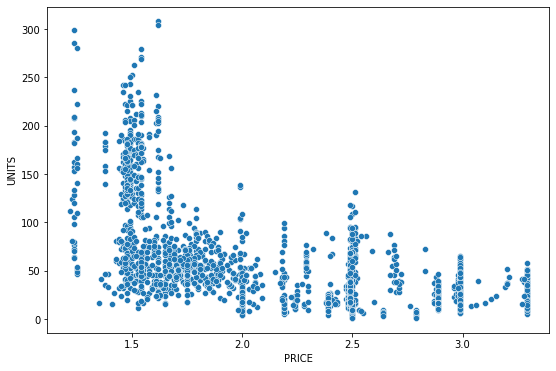

In [14]:
# 価格と販売数のプロット
plt.figure(figsize=(9, 6))
sns.scatterplot(x="PRICE", y="UNITS", data=df)

<AxesSubplot:xlabel='PRICE', ylabel='UNITS'>

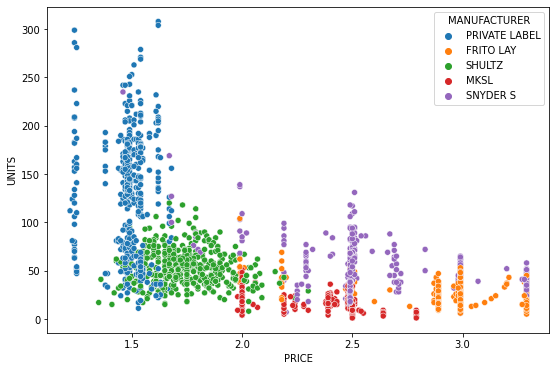

In [15]:
# メーカー別の価格と販売数のプロット
plt.figure(figsize=(9, 6))
sns.scatterplot(x="PRICE", y="UNITS", hue="MANUFACTURER", data=df)

<AxesSubplot:xlabel='PRICE', ylabel='UNITS'>

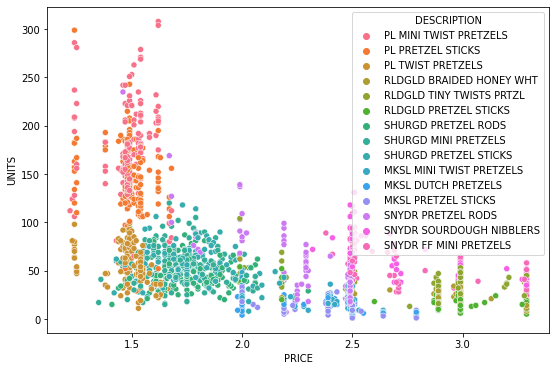

In [16]:
# 商品別での価格と販売数のプロット
plt.figure(figsize=(9, 6))
sns.scatterplot(x="PRICE", y="UNITS", hue="DESCRIPTION", data=df)

In [17]:
manufacturers = df["MANUFACTURER"].unique().tolist()
items = df["DESCRIPTION"].unique().tolist()

{'PRIVATE LABEL': -0.07,
 'FRITO LAY': -0.49,
 'SHULTZ': -0.14,
 'MKSL': -0.25,
 'SNYDER S': -0.46}

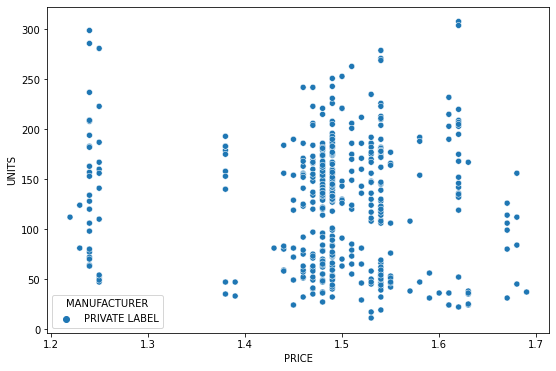

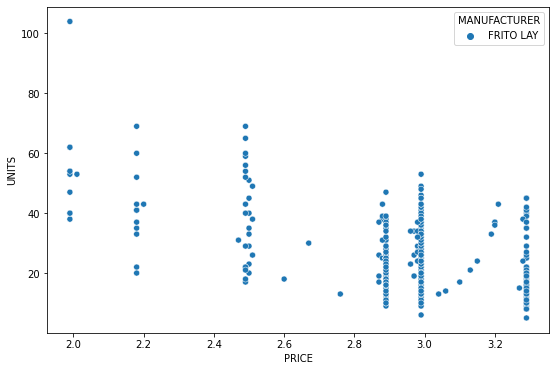

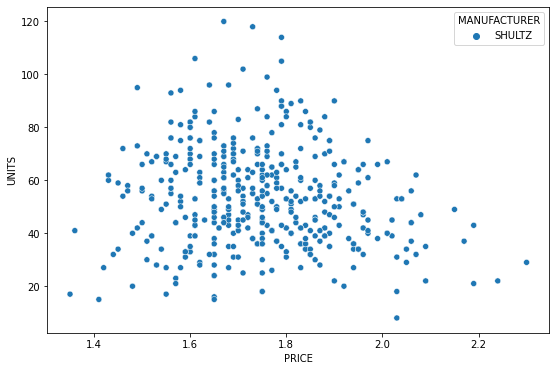

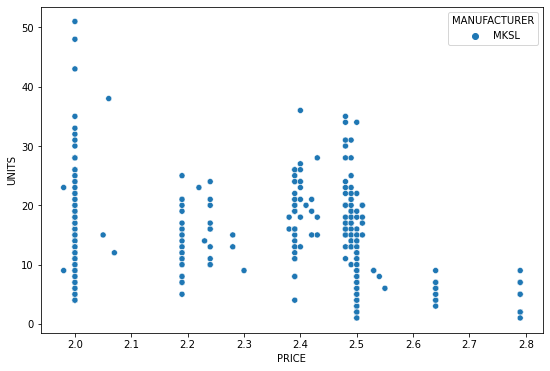

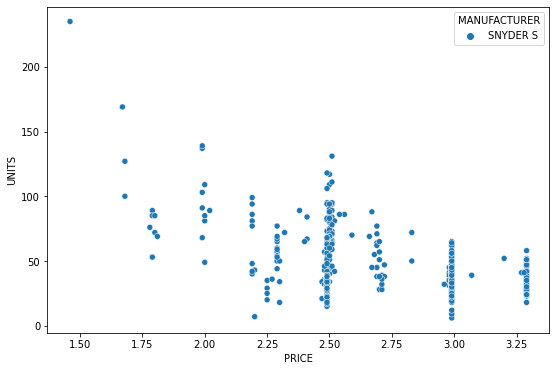

In [18]:
# メーカー別の価格と販売数の相関係数
corr_manu = dict()
for manufacturer in manufacturers:
    df_ = df[df["MANUFACTURER"] == manufacturer]
    corrcoef = round(df_.corr().iloc[0][1], 2)
    corr_manu[manufacturer] = corrcoef
    # プロット
    plt.figure(figsize=(9, 6))
    sns.scatterplot(x="PRICE", y="UNITS", hue="MANUFACTURER", data=df_)
corr_manu

{'PL MINI TWIST PRETZELS': 0.05,
 'PL PRETZEL STICKS': -0.29,
 'PL TWIST PRETZELS': -0.37,
 'RLDGLD BRAIDED HONEY WHT': -0.51,
 'RLDGLD TINY TWISTS PRTZL': -0.45,
 'RLDGLD PRETZEL STICKS': -0.67,
 'SHURGD PRETZEL RODS': -0.06,
 'SHURGD MINI PRETZELS': -0.02,
 'SHURGD PRETZEL STICKS': -0.24,
 'MKSL MINI TWIST PRETZELS': -0.32,
 'MKSL DUTCH PRETZELS': -0.23,
 'MKSL PRETZEL STICKS': -0.21,
 'SNYDR PRETZEL RODS': -0.8,
 'SNYDR SOURDOUGH NIBBLERS': -0.7,
 'SNYDR FF MINI PRETZELS': -0.67}

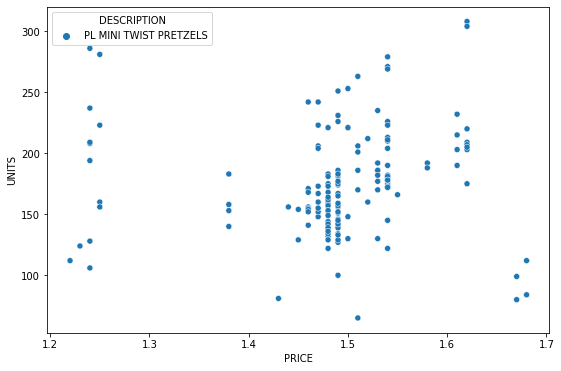

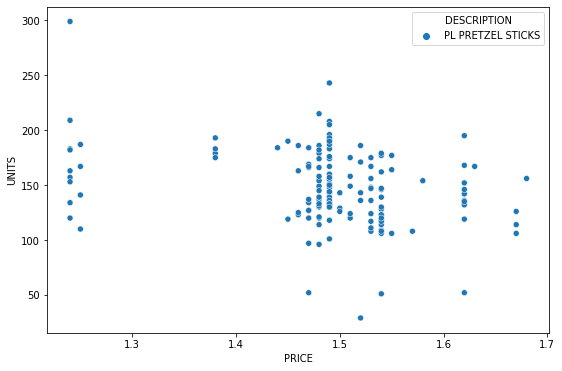

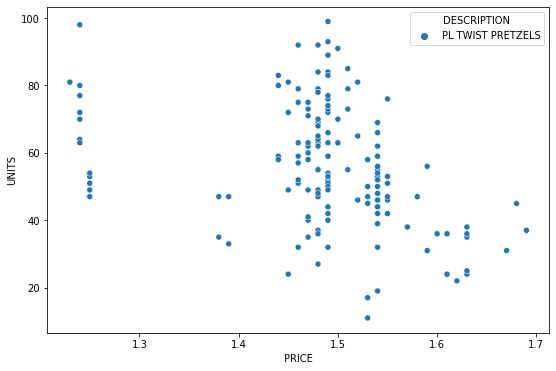

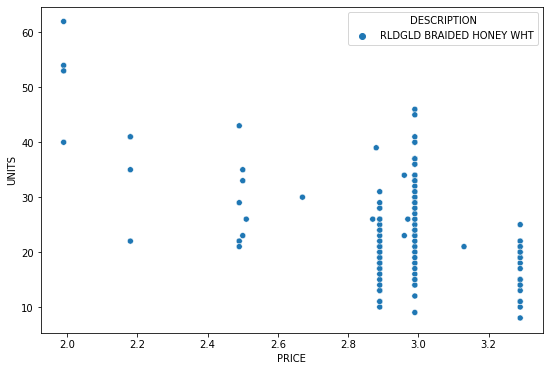

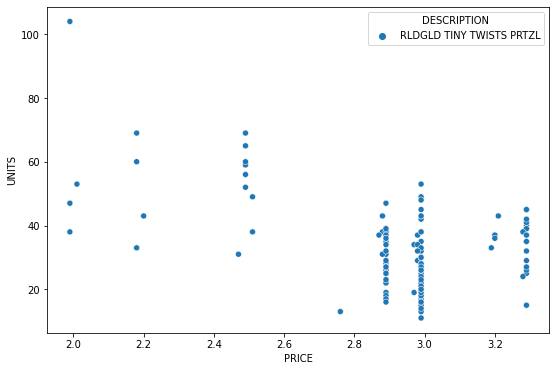

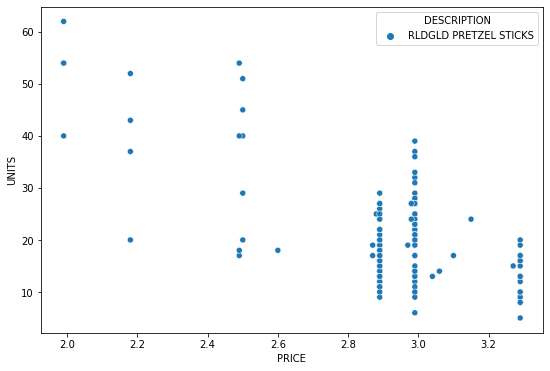

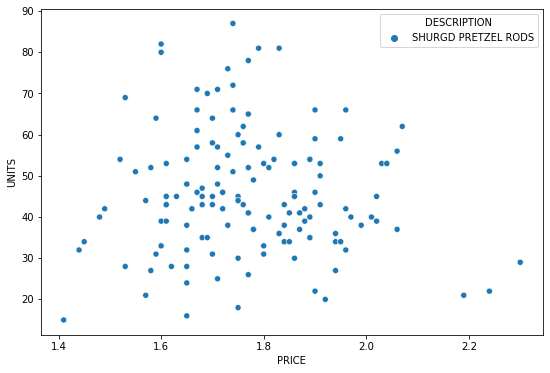

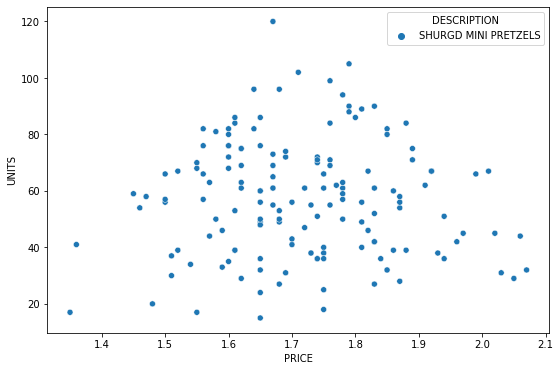

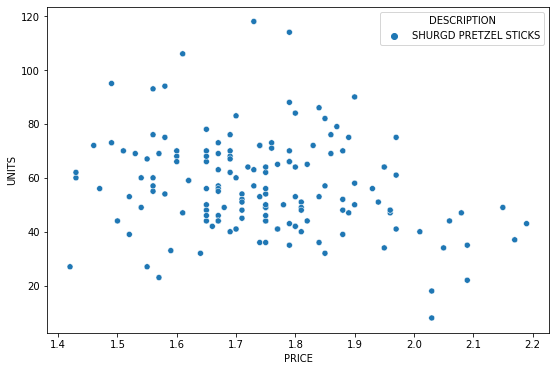

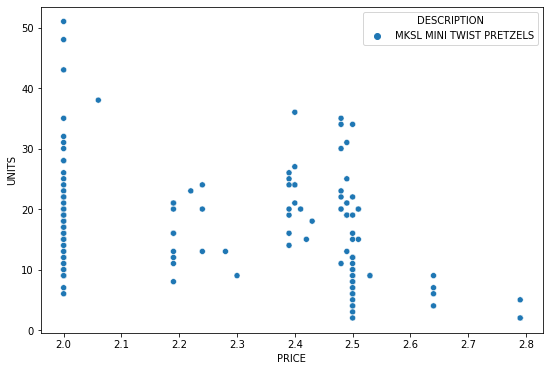

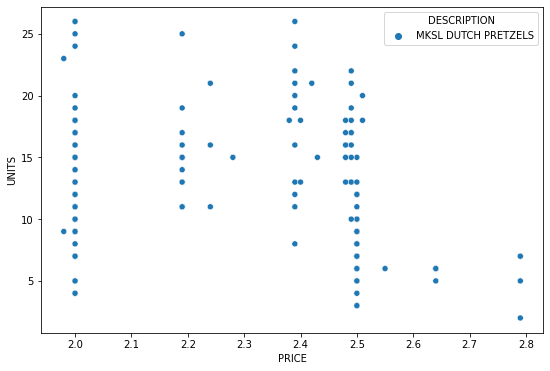

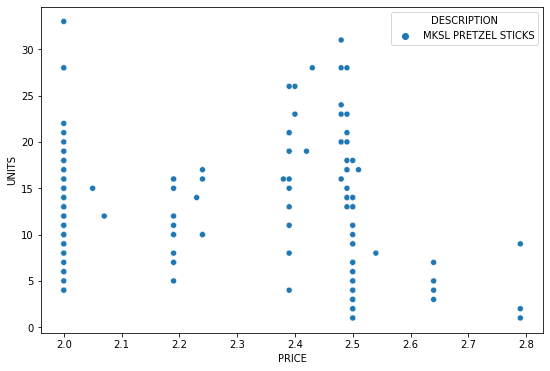

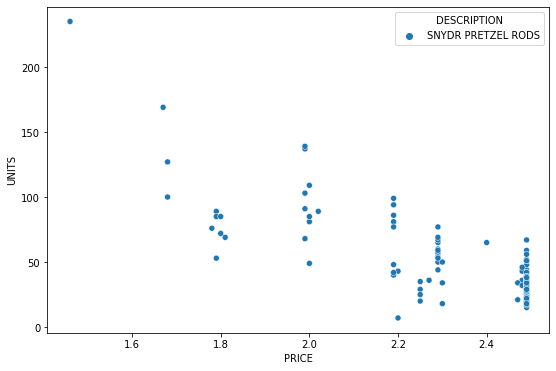

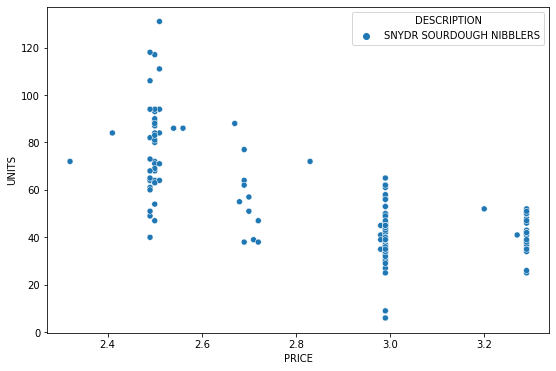

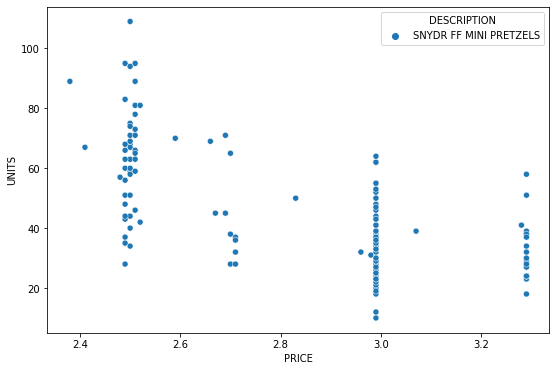

In [19]:
# 商品別の価格と販売数の相関係数
corr_item = dict()
for item in items:
    df_ = df[df["DESCRIPTION"] == item]
    corrcoef = round(df_.corr().iloc[0][1], 2)
    corr_item[item] = corrcoef
    # プロット
    plt.figure(figsize=(9, 6))
    sns.scatterplot(x="PRICE", y="UNITS", hue="DESCRIPTION", data=df_)
corr_item